In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random
#import tensorflow as tf

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
y = np.genfromtxt('data/output.csv', delimiter=',')
y.shape

(20000,)

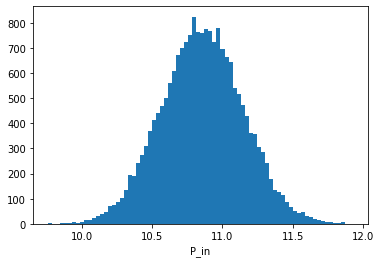

In [4]:
# Plot historgram
plt.hist(y, bins = 'auto')
plt.xlabel('P_in')
plt.show()

In [ ]:
scale = max(self.data) - min(self.data)

In [6]:
(max(y) - min(y))/2

1.0801046345043313

In [9]:
y_test = y/1.09

In [15]:
np.mean(y_test)
np.min(y)

9.763923621594225

In [21]:
1/(np.mean(y)-np.min(y))

0.9158930617746588

In [19]:
1/1.0918305222908593

0.9158930617746588

In [14]:
1/0.10241784335432183

9.763923621594225

In [39]:
y_test = (y -  8.417802033380093 )/164.2301758633106
np.mean(y_test)

0.014844726906546748

In [35]:
np.mean(y - 8.417802033380093)

2.437952110504991

In [33]:
y_mean = y - np.mean(y)
1/np.sum(y_mean)/len(y)

45108169.34465641

In [36]:
np.max(y)-np.min(y)

2.1602092690086625

In [64]:
y_test = y[:2000]
np.mean(y_test)

10.850547759768379

In [24]:
for i in range(1, 10, 2):
    print(i)

1
3
5
7
9


In [60]:
y_test[:3]

array([11.34101446, 11.13202457, 10.70173053])

In [171]:
quantile_plot = np.zeros(2000)
quantile_plot_max = np.zeros(2000)
quantile_plot_min = np.zeros(2000)
quantile_plot_mean = np.zeros(2000)
quantile_plot_max_mean = np.zeros(2000)
quantile_plot_min_mean = np.zeros(2000)
index = 0
for i in range(2, len(y), 10):
    random.seed(12345)
    test = np.random.choice(y, i)
    param = scipy.stats.norm.fit(test)
    q_min, q_max = scipy.stats.norm.ppf([0.0001, 0.9999], *param)
    quantile_plot[index] = q_max - q_min
    #print(quantile_plot[:index])
    quantile_plot_mean[index] = np.mean(quantile_plot[:index])
    quantile_plot_min[index] = q_min
    quantile_plot_max[index] = q_max
    if abs((quantile_plot_mean[index] - quantile_plot_mean[index-1])) < 1e-6:
        break
    index += 1

In [170]:
quantile_plot_total = quantile_plot
quantile_plot_mean_total = quantile_plot_mean

In [172]:
end_loop_index = np.where(quantile_plot_mean==0)[0][0]

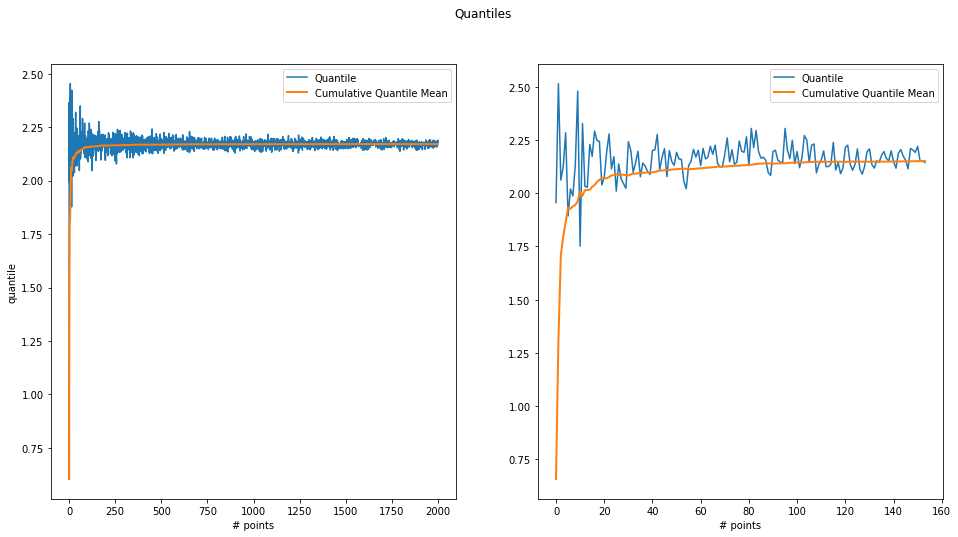

In [200]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Quantiles')
ax1.plot(quantile_plot_total, label = 'Quantile')
ax1.plot(quantile_plot_mean_total, label = 'Cumulative Quantile Mean', linewidth=2)
ax1.set_xlabel('# points')
ax1.set_ylabel('quantile')
ax1.legend()
ax2.plot(quantile_plot[1:end_loop_index], label = 'Quantile')
ax2.plot(quantile_plot_mean[1:end_loop_index], label = 'Cumulative Quantile Mean',linewidth=2)
ax2.set_xlabel('# points')
ax2.legend()


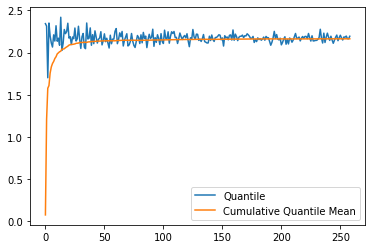

In [158]:
ax1.plot(quantile_plot[1:end_loop_index], label = 'Quantile')
ax1.plot(quantile_plot_mean[1:end_loop_index], label = 'Cumulative Quantile Mean')
ax1.legend()

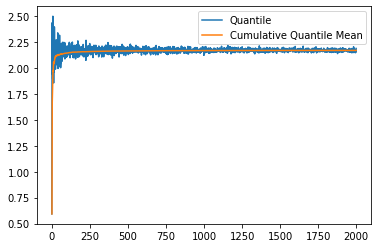

In [161]:
plt.plot(quantile_plot, label = 'Quantile')
plt.plot(quantile_plot_mean, label = 'Cumulative Quantile Mean')
plt.legend()

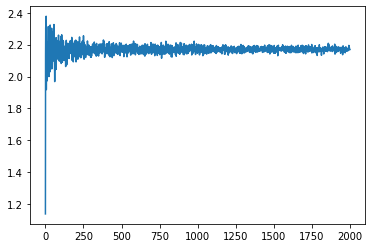

In [46]:
plt.plot(quantile_plot)

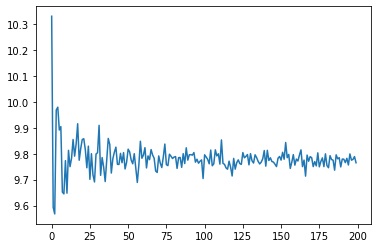

In [57]:
plt.plot(quantile_plot_min)

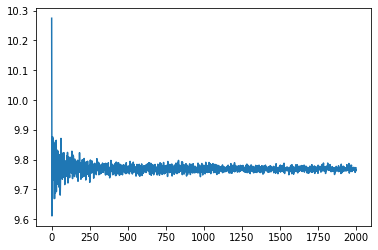

In [47]:
plt.plot(quantile_plot_min)

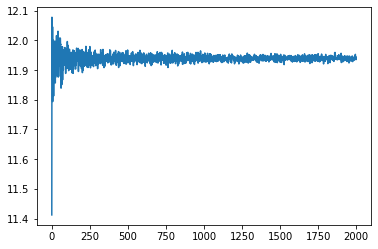

In [48]:
plt.plot(quantile_plot_max)

In [24]:
beta_data = (y - min(y)) / (max(y) - min(y))

* Data distributed in the interval [0,1]

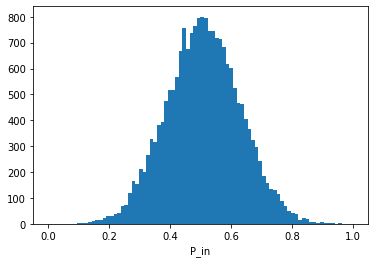

In [8]:
# Plot historgram
plt.hist(beta_data, bins = 'auto')
plt.xlabel('P_in')
plt.show()

**Neural Net to Beta**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
def beta_layer(x):
    # Get the number of dimensions of the input
    num_dims = len(x.get_shape())
    
    # Separate the parameters
    n, p = tf.unstack(x, num=2, axis=-1)
    
    # Add one dimension to make the right shape
    n = tf.expand_dims(n, -1)
    p = tf.expand_dims(p, -1)
        
    # Apply a softplus to make positive
    n = tf.keras.activations.softplus(n)
    
    # Apply a sigmoid activation to bound between 0 and 1
    p = tf.keras.activations.softplus(p)

    # Join back together again
    out_tensor = tf.concat((n, p), axis=num_dims-1)

    return out_tensor

In [25]:
x[0]

array([3.28426550e+00, 7.84494113e-03, 3.18548348e+00, 1.33494234e+01,
       4.57240717e+05, 7.48877190e-01, 4.24657373e-06, 1.81412477e-02,
       8.80869984e-02])

In [91]:
def beta_loss(y_true, y_pred):
    
    # Separate the parameters
    alpha, beta = tf.unstack(y_pred, num=2, axis=-1)
    
    # Add one dimension to make the right shape
    alpha = tf.expand_dims(alpha, -1)
    beta = tf.expand_dims(beta, -1)
    
    # Calculate the negative log likelihood
    
    nll = (
        math.log(math.gamma(alpha))
        + math.log(math.gamma(beta))
        - math.log(math.gamma(alpha*beta))
        - (alpha - 1)*tf.math.log(y_true)
        - (beta - 1)*tf.math.log(1 - y_true)
    )
                
    return nll

In [81]:
nll = (
        tf.math.lgamma(alpha)
        + tf.math.lgamma(beta)
        - tf.math.lgamma(alpha*beta)
        - (alpha - 1)*tf.math.log(y_true)
        - (beta - 1)*tf.math.log(1 - y_true)
    )
float(nll.numpy())

-0.017121441662311554

In [50]:
alpha = 0.99
beta = 0.99
y_true = 0.76

In [59]:
math.log(math.gamma(0.99))

0.0058548067647095576

In [60]:

nll

<tf.Tensor: shape=(), dtype=float32, numpy=-0.017121416>

In [92]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

input_shape = (x.shape[1],)

model = keras.Sequential([
    layers.Dense(units=52, activation='softplus', input_shape=input_shape),
    layers.Dense(units=52, activation='softplus'),
    layers.Dense(units=2),
    layers.Lambda(beta_layer)
])

In [96]:
loss_fn = tf.keras.losses.mean_squared_error

In [97]:
from tensorflow.keras.optimizers import Adam

opt = Adam()
model.compile(loss = loss_fn, optimizer = opt)

In [98]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_Y, val_Y = train_test_split(x, beta_data, test_size=0.25)
num_epochs = 2

In [64]:
def plot_results(history):
    val_loss, val_acc, loss, acc = history.history.values()
    #val_acc, val_loss, acc, loss = history.history.values()

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

In [99]:
history = model.fit(train_X, train_Y, epochs = num_epochs,
                    validation_data = (val_X, val_Y))

Epoch 1/2
469/469 [==============================] - 1s 2ms/step - loss: 36424437.2489 - val_loss: 0.2709
Epoch 2/2
469/469 [==============================] - 1s 2ms/step - loss: 0.2740 - val_loss: 0.2709


In [101]:
history.

In [100]:
# Plot the history from the training run
plot_results(history)

ValueError: not enough values to unpack (expected 4, got 2)